# Team:
- Balam Euan Cesar Arturo
- De Gante Pérez Diego
- Garcia Martinez Rodrigo
- Polanco González Roselyn
- Ramirez Rubio Mauricio

# Multivariate Linear Regression

In this assignment, you will implement multivariate linear regression to predict the price of houses based on its characteristics.

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. The file houses.csv contains a training set of housing prices in the city of Valladolid. The first column is the size of the house (in square feet), the second column is the number of bedrooms and the third column is the price of the house. Dataset is like below:

| Size of the house (in square feet) | Number of bedrooms | Price of the house |
|------------------------------------|--------------------|--------------------|
| 2104                               | 3                  | 399900             |
| 1600                               | 3                  | 329900             |
| 2400                               | 3                  | 369000             |


You should fit a multivariate linear regression model using size and bedrooms as variables to predict the price:
* Plot scatterplot of the two variables against price
* Use Scikit-learn to fit the model
* Compute the parameters with the normal equations using np.linalg.inv()
* Compute the parameters with the pseudo-inverse using np.linalg.pinv()
* Plot the fitted surface obtained with any of the previous methods

After that, you should implement the gradient descent algorithm to train a multivariate linear regression model. Try to fit the model with gradient descent and describe the results.

Note that you should standardize the values of the input variables, substracting the mean and dividing by the standard deviation.

For batch gradient descent you should consider the following:

* Define a variable for the learning rate $\alpha$ and try with a default value of 0.01.
* Define a maximum number of iterations with 5000 as default.
* Initialize $\boldsymbol{\theta}$ with random values or zeros.
* Plot J as a function of time (iterations).

Finally, you should implement stochastic and mini-batch gradient descent and compare the parameters obtained with all methods.
- Scikit-learn
- Normal equations
- Pseudo-inverse
- Gradient descent (batch)
- Gradient descent (stochastic)
- Gradient descent (mini-batch)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Remove scientific notation in NumPy arrays for better readability
np.set_printoptions(suppress=True)

In [6]:
# Load the “houses.csv” dataset; column names are assigned manually
# because the CSV does not have a header
houses = pd.read_csv("houses.csv", names=["size", "rooms", "price"])
houses.head()

,size,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [7]:
# Separate features X and the target variable, where
# X contains ‘size’ and ‘rooms’; Y contains 'price'
X_data = np.array(houses[['size', 'rooms']])        # Feature matrix (n_samples x 2)
y_data = np.array(houses['price']).reshape(-1, 1)   # Vector price column (n_samples x 1) where reshape changes the dimension to a single-column matrix without modifying the data
X_data.shape, y_data.shape                          # Verify the dimensions of X_data and y_data

((47, 2), (47, 1))

### Raw data (without normalization)

In [8]:
# ====== Unnormalized data (for sklearn, Normal Eq, SVD) ======
# We save X_raw before applying StandardScaler
X_raw = np.c_[np.ones(X_data.shape[0]), X_data]  # [1, size, rooms] - raw data
X_raw

array([[   1., 2104.,    3.],
       [   1., 1600.,    3.],
       [   1., 2400.,    3.],
       [   1., 1416.,    2.],
       [   1., 3000.,    4.],
       [   1., 1985.,    4.],
       [   1., 1534.,    3.],
       [   1., 1427.,    3.],
       [   1., 1380.,    3.],
       [   1., 1494.,    3.],
       [   1., 1940.,    4.],
       [   1., 2000.,    3.],
       [   1., 1890.,    3.],
       [   1., 4478.,    5.],
       [   1., 1268.,    3.],
       [   1., 2300.,    4.],
       [   1., 1320.,    2.],
       [   1., 1236.,    3.],
       [   1., 2609.,    4.],
       [   1., 3031.,    4.],
       [   1., 1767.,    3.],
       [   1., 1888.,    2.],
       [   1., 1604.,    3.],
       [   1., 1962.,    4.],
       [   1., 3890.,    3.],
       [   1., 1100.,    3.],
       [   1., 1458.,    3.],
       [   1., 2526.,    3.],
       [   1., 2200.,    3.],
       [   1., 2637.,    3.],
       [   1., 1839.,    2.],
       [   1., 1000.,    1.],
       [   1., 2040.,    4.],
       [  

### Standardize data

Sometimes can be useful to standardize the input variables to help with convergence in gradient descent. Note that this may not be necessary for sklearn, normal equations and SVD, but done here just to compare results with gradient descent method.

In [9]:
# Instantiate the escalator and adjust-transform the features
# StandardScaler: z = (x - mean) / std
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)  # Now X_data has mean≈0 and std≈1 per column.
X_data

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517],
       [-0.01994505,  1.10220517],
       [-0.59358852, -0.22609337],
       [-0.72968575, -0.22609337],
       [-0.78946678, -0.22609337],
       [-0.64446599, -0.22609337],
       [-0.0771822 ,  1.10220517],
       [-0.000866  , -0.22609337],
       [-0.14077904, -0.22609337],
       [ 3.15099326,  2.4305037 ],
       [-0.9319237 , -0.22609337],
       [ 0.38071502,  1.10220517],
       [-0.86578299, -1.5543919 ],
       [-0.97262567, -0.22609337],
       [ 0.77374348,  1.10220517],
       [ 1.31050078,  1.10220517],
       [-0.29722726, -0.22609337],
       [-0.14332291, -1.5543919 ],
       [-0.50455295, -0.22609337],
       [-0.0491996 ,  1.10220517],
       [ 2.40309445, -0.22609337],
       [-1.14560907, -0.22609337],
       [-0.69025572, -0.22609337],
       [ 0.66817273, -0.22609337],
       [ 0.25352135,

### Include $x_0$ for the bias term.
We want to include the *bias* term in the model, so we include an additional column (variable $x_0$) full of ones.

In [10]:
# Concatenate the ones column at the beginning of the feature matrix
# The resulting X has the shape (n_samples x 3): [1, size_std, rooms_std]
X = np.c_[np.ones(X_data.shape[0]), X_data]
X

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517],
       [ 1.        , -0.01994505,  1.10220517],
       [ 1.        , -0.59358852, -0.22609337],
       [ 1.        , -0.72968575, -0.22609337],
       [ 1.        , -0.78946678, -0.22609337],
       [ 1.        , -0.64446599, -0.22609337],
       [ 1.        , -0.0771822 ,  1.10220517],
       [ 1.        , -0.000866  , -0.22609337],
       [ 1.        , -0.14077904, -0.22609337],
       [ 1.        ,  3.15099326,  2.4305037 ],
       [ 1.        , -0.9319237 , -0.22609337],
       [ 1.        ,  0.38071502,  1.10220517],
       [ 1.        , -0.86578299, -1.5543919 ],
       [ 1.        , -0.97262567, -0.22609337],
       [ 1.        ,  0.77374348,  1.10220517],
       [ 1.        ,  1.31050078,  1.10220517],
       [ 1.        , -0.29722726, -0.226

Here we also transform the target variable $y$ to thousand of dollars. This is also not required, but done here for convenience.

In [11]:
# Convert prices to thousands of dollars to work with more manageable numbers
# This does not affect the model, it just makes it easier to interpret theta
# Note: GD MSE is in (thousands of $)², analytical MSE is in ($)²
y = y_data / 1000
y

array([[399.9  ],
       [329.9  ],
       [369.   ],
       [232.   ],
       [539.9  ],
       [299.9  ],
       [314.9  ],
       [198.999],
       [212.   ],
       [242.5  ],
       [239.999],
       [347.   ],
       [329.999],
       [699.9  ],
       [259.9  ],
       [449.9  ],
       [299.9  ],
       [199.9  ],
       [499.998],
       [599.   ],
       [252.9  ],
       [255.   ],
       [242.9  ],
       [259.9  ],
       [573.9  ],
       [249.9  ],
       [464.5  ],
       [469.   ],
       [475.   ],
       [299.9  ],
       [349.9  ],
       [169.9  ],
       [314.9  ],
       [579.9  ],
       [285.9  ],
       [249.9  ],
       [229.9  ],
       [345.   ],
       [549.   ],
       [287.   ],
       [368.5  ],
       [329.9  ],
       [314.   ],
       [299.   ],
       [179.9  ],
       [299.9  ],
       [239.5  ]])

### Plot the data

Now that we have our data prepared, let's plot the independent variables (features) along with the dependent variable (target).

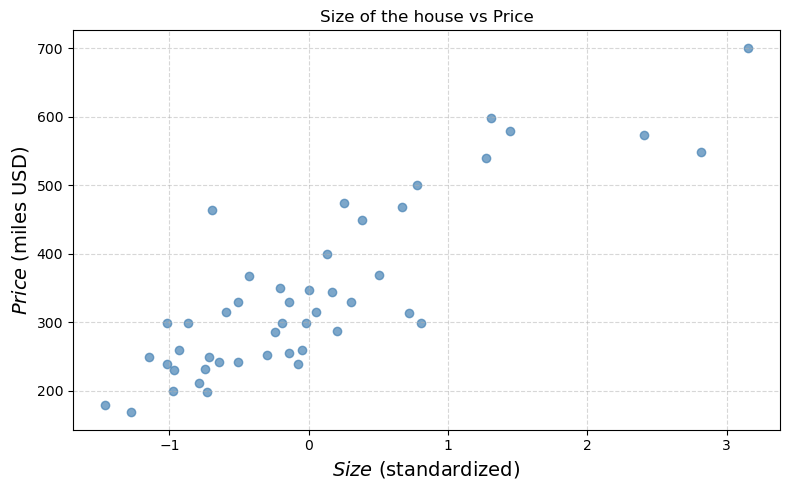

In [12]:
# Create figure
plt.figure(figsize=(8, 5))

# Size scatter plot (standardized) vs price
plt.scatter(X[:, 1], y, color='steelblue', alpha=0.7)

# Labels and title
plt.xlabel("$Size$ (standardized)", fontsize=14)
plt.ylabel("$Price$ (miles USD)", fontsize=14)
plt.title("Size of the house vs Price")

# Grid, margin adjustment, and display
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

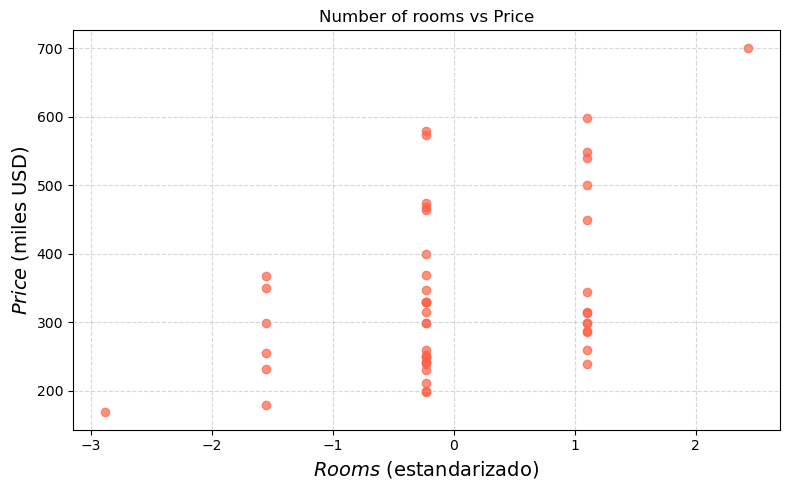

In [13]:
# Create figure
plt.figure(figsize=(8, 5))

# Size scatter plot (standardized) vs price
plt.scatter(X[:, 2], y, color='tomato', alpha=0.7)

# Labels and title
plt.xlabel("$Rooms$ (estandarizado)", fontsize=14)
plt.ylabel("$Price$ (miles USD)", fontsize=14)
plt.title("Number of rooms vs Price")

# Grid, margin adjustment, and display
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

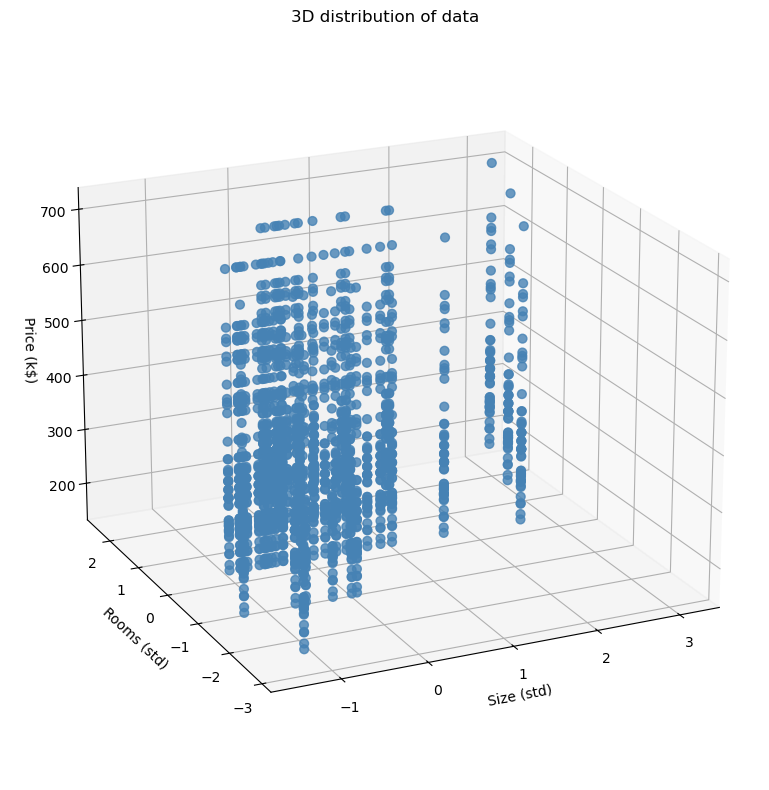

In [14]:
# Create 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D: size (eje X), rooms (eje Y), precio (eje Z)
ax.scatter(X[:, 1], X[:, 2], y, c='steelblue', s=40, alpha=0.8)

# Labels for each axis and title
ax.set_xlabel('Size (std)')
ax.set_ylabel('Rooms (std)')
ax.set_zlabel('Price (k$)')
ax.set_title('3D distribution of data')

# Camera angle: elevation=20°, azimuth=245°
ax.view_init(20, 245)

# Margin adjustment and display
plt.tight_layout()
plt.show()

### 1. Scikit-learn

In [15]:
# Instantiate and adjust the sklearn linear regression model
# fit_intercept=False: the intercept is already included in the ones column of X
lr = LinearRegression(fit_intercept=False)
lr.fit(X_raw, y_data)  # Adjust the model: X (n x 3), y (n x 1)

# Extract the theta coefficients found by sklearn
theta_sklearn = lr.coef_.T  # Transpose to obtain a column vector (3 x 1) instead of (1 x 3)
print("Parameters (sklearn):")
print(f"  θ₀ (bias):  {theta_sklearn[0][0]:.4f}")
print(f"  θ₁ (size):  {theta_sklearn[1][0]:.4f}")
print(f"  θ₂ (rooms): {theta_sklearn[2][0]:.4f}")

Parameters (sklearn):
  θ₀ (bias):  89597.9095
  θ₁ (size):  139.2107
  θ₂ (rooms): -8738.0191


$\hat{y} = 340.4127 + 109.4478 x_1 - 6.5784 x_2$

In [16]:
lr.predict(X_raw)

array([[356283.1103389 ],
       [286120.93063401],
       [397489.46984812],
       [269244.1857271 ],
       [472277.85514636],
       [330979.02101847],
       [276933.02614885],
       [262037.48402897],
       [255494.58235014],
       [271364.59918815],
       [324714.54068768],
       [341805.20024107],
       [326492.02609913],
       [669293.21223209],
       [239902.98686016],
       [374830.38333402],
       [255879.96102141],
       [235448.2452916 ],
       [417846.48160547],
       [476593.38604091],
       [309369.11319496],
       [334951.62386342],
       [286677.77333009],
       [327777.17551607],
       [604913.37413438],
       [216515.5936252 ],
       [266353.01492351],
       [415030.01477434],
       [369647.33504459],
       [430482.39959029],
       [328130.30083656],
       [220070.5644481 ],
       [338635.60808944],
       [500087.73659911],
       [306756.36373941],
       [263429.59076914],
       [235865.87731365],
       [351442.99009906],
       [6414

### Plot the data

In [17]:
theta_hat = lr.coef_.T
theta_hat

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [18]:
size_points, rooms_points = np.meshgrid([np.min(X_raw[:,1]), np.max(X_raw[:,1])],[np.min(X_raw[:,2]), np.max(X_raw[:,2])])
size_points, rooms_points

(array([[ 852., 4478.],
        [ 852., 4478.]]),
 array([[1., 1.],
        [5., 5.]]))

In [19]:
# Calculate the values of the plane: ŷ = θ₀ + θ₁·size + θ₂·rooms
price_points = theta_hat[0] + theta_hat[1] * size_points + theta_hat[2] * rooms_points

Text(0.5, 0.92, 'Regression plane')

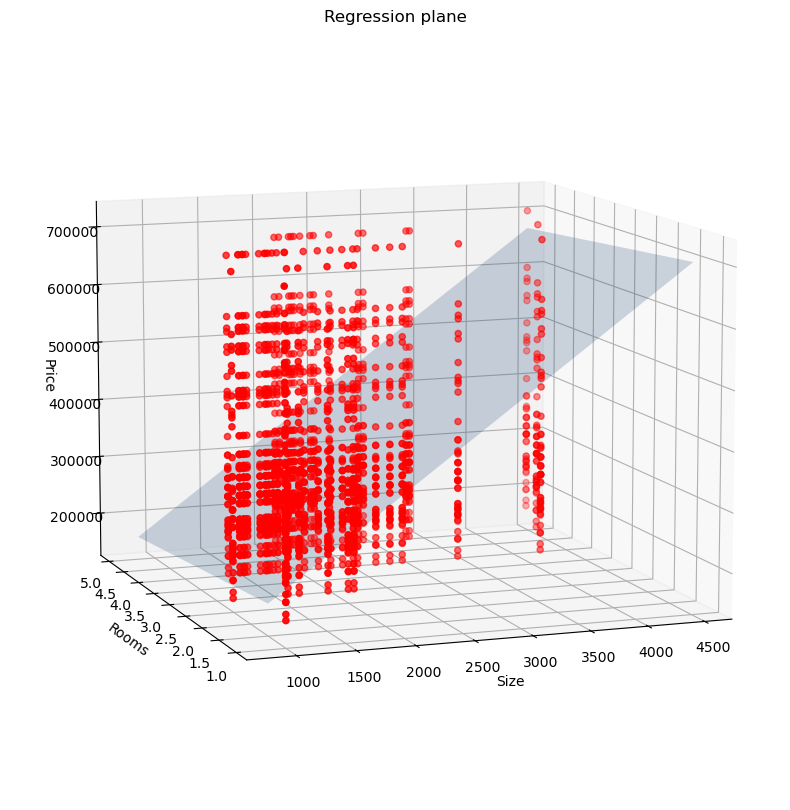

In [20]:
# Plot actual data (red dots) + adjusted plane (blue surface)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_raw[:,1], X_raw[:,2], y_data, c='r')
ax.set_xlabel('Size')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price')
ax.plot_surface(size_points, rooms_points, price_points, alpha=0.2, color='dodgerblue')
ax.view_init(10, 250)
ax.set_title('Regression plane')

In [21]:
import plotly.express as px
import plotly.graph_objects as go

fig_layout = go.Layout(title='Fitted model', autosize=True, width=800, height=800,
                       scene = dict(xaxis=dict(title='Size'),
                                    yaxis=dict(title='Rooms'),
                                    zaxis=dict(title='Price')))

fig = px.scatter_3d(x=X_raw[:,1].ravel(), y=X_raw[:,2].ravel(), z=y_data.ravel())
fig.update_traces(marker=dict(size=3))
fig.update_layout(fig_layout)
fig.add_traces(go.Surface(x=size_points, y=rooms_points, z=price_points, opacity=0.2))

fig.show()

### 2. Normal equation

Parameters (Normal Equation):
  θ₀ (bias):  89597.9095
  θ₁ (size):  139.2107
  θ₂ (rooms): -8738.0191
MSE (Normal Equation): 4086560101.2057


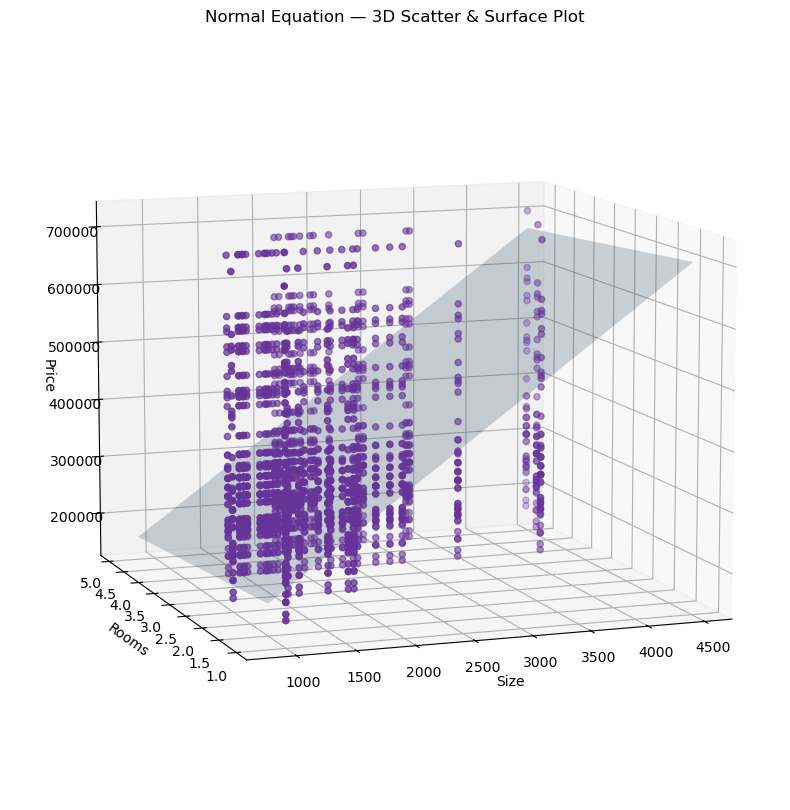

In [22]:
"""
Normal Equation finds the exact solution in one step using linear algebra.
No iterations needed — it directly minimizes the cost function analytically.
"""

# Normal equation: θ = (XᵀX)⁻¹ Xᵀy
theta = np.linalg.inv(X_raw.T.dot(X_raw)).dot(X_raw.T).dot(y_data)  # Exact least squares solution

# Print parameters and MSE
print("Parameters (Normal Equation):")
print(f"  θ₀ (bias):  {theta[0][0]:.4f}")
print(f"  θ₁ (size):  {theta[1][0]:.4f}")
print(f"  θ₂ (rooms): {theta[2][0]:.4f}")
print(f"MSE (Normal Equation): {mean_squared_error(y_data, X_raw @ theta):.4f}")

# Create a min/max point grid to graph the plane
size_points, rooms_points = np.meshgrid(
    [np.min(X_raw[:,1]), np.max(X_raw[:,1])],  # Size range
    [np.min(X_raw[:,2]), np.max(X_raw[:,2])]   # Rooms range
)

# Calculate height of the plane: ŷ = θ₀ + θ₁·size + θ₂·rooms
price_points = theta[0] + theta[1] * size_points + theta[2] * rooms_points

# Graph real data + adjusted plane
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_raw[:,1], X_raw[:,2], y_data, c='rebeccapurple')   # Real points
ax.set_xlabel('Size')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price')
ax.plot_surface(size_points, rooms_points, price_points, alpha=0.2)  # Adjusted plane
ax.set_title("Normal Equation — 3D Scatter & Surface Plot")
ax.view_init(10, 250)                  # Camera angle
plt.show()

### 3. SVD pseudoinverse

In [ ]:
"""
SVD Pseudoinverse decomposes X into U, Σ, Vᵀ and manually builds the pseudoinverse.
More transparent than np.linalg.pinv() — shows each step of the decomposition.
X = U · Σ · Vᵀ  →  X⁺ = V · Σ⁺ · Uᵀ
"""

# Break down X into its three matrices: U (n x p), s (singular values), Vt (p x p)
# full_matrices=False → reduced version, more efficient
U, s, Vt = np.linalg.svd(X_raw, full_matrices=False)
print(f"U: {U.shape}, s: {s.shape}, Vt: {Vt.shape}")
print("Singular values:", s)  # Singular values: indicate the “weight” of each dimension

# Construct Σ⁺: invert each singular value (1/σ) on the diagonal
S_pinv = np.diag(1 / s)

# Constructing the pseudoinverse manually: X⁺ = V^T · Σ⁺ · U^T
X_pinv = Vt.T @ S_pinv @ U.T

# Calculate theta: θ = X⁺ · y
theta_pinv = X_pinv @ y_data

# Print the parameters
print("Parameters SVD Pseudoinverse:")
print(f"  θ₀ (bias):  {theta_pinv[0][0]:.4f}")
print(f"  θ₁ (size):  {theta_pinv[1][0]:.4f}")
print(f"  θ₂ (rooms): {theta_pinv[2][0]:.4f}")

# Calculate the MSE
y_pred_pinv = X_raw @ theta_pinv
mse_pinv = mean_squared_error(y_data, y_pred_pinv)
print(f"MSE (SVD): {mse_pinv:.4f}")

# Verify that the manual calculation matches np.linalg.pinv()
# np.allclose() returns True if both arrays are nearly equal (difference < 1e-8)
theta_pinv_check = np.linalg.pinv(X_raw) @ y_data
print("\nVerification np.linalg.pinv():", np.allclose(theta_pinv, theta_pinv_check))

U: (47, 3), s: (3,), Vt: (3, 3)
Singular values: [14737.02479368     7.06597498     1.51741344]
Parameters SVD Pseudoinverse:
  θ₀ (bias):  89597.9095
  θ₁ (size):  139.2107
  θ₂ (rooms): -8738.0191
MSE (SVD): 4086560101.2057

Verification np.linalg.pinv(): True


---
### Helper cost_function for Gradient Descent variants (batch, stochastic, and mini-batch)

In [ ]:
# This function is used to record the GLOBAL cost (for all data) for comparison in section #7.

def cost_function(X, y, theta):
    m = len(y)                                       # number of training examples (47)
    predictions = X @ theta                          # predicted prices (47x1)
    errors = predictions - y                         # residuals
    cost = (1 / (2 * m)) * np.sum(errors ** 2)      # J(θ)
    return cost

---

### 4. Gradient descent (batch)

In [ ]:
"""
Batch Gradient Descent uses ALL training examples in each iteration to compute
the gradient.
θ := θ - α · (1/m) · Xᵀ(Xθ - y)
"""

def batch_gradient_descent(x, y, alpha=0.01, n_iterations=5000):
    """
    Implements Batch Gradient Descent for linear regression.

    Args:
        x: Feature matrix with bias (m x n)
        y: Target vector (m x 1)
        alpha: Learning rate
        n_iterations: Number of iterations
    Returns:
        theta: Parameters found (n x 1)
        history: History of cost J per iteration
    """
    m, n = x.shape                              # m = samples, n = parameters
    theta = np.zeros((n, 1))                    # Initialize θ to zero (n x 1)
    history = []                                # Overall cost history

    for iteration in range(n_iterations):
        predictions = x @ theta                 # Predictions: ŷ = Xθ → (m x 1)
        error = predictions - y                 # Residuals: ŷ - y → (m x 1)
        gradients = (1/m) * x.T @ error         # Average gradient → (n x 1)
        theta = theta - alpha * gradients       # Update θ
        history.append(cost_function(x, y, theta))  # Record overall cost
    return theta, history


# Train the model with Batch Gradient Descent
theta_gd, history_batch = batch_gradient_descent(X, y, alpha=0.01, n_iterations=5000)

# Print parameters and MSE
print("Parameters (Batch Gradient Descent):")
print(f"  θ₀ (bias):  {theta_gd[0][0]:.4f}")
print(f"  θ₁ (size):  {theta_gd[1][0]:.4f}")
print(f"  θ₂ (rooms): {theta_gd[2][0]:.4f}")
y_pred_gd = X @ theta_gd                       # Final predictions
print(f"MSE (Batch GD): {mean_squared_error(y, y_pred_gd):.4f}")

Parameters (Batch Gradient Descent):
  θ₀ (bias):  340.4127
  θ₁ (size):  109.4478
  θ₂ (rooms): -6.5784
MSE (Batch GD): 4086.5601


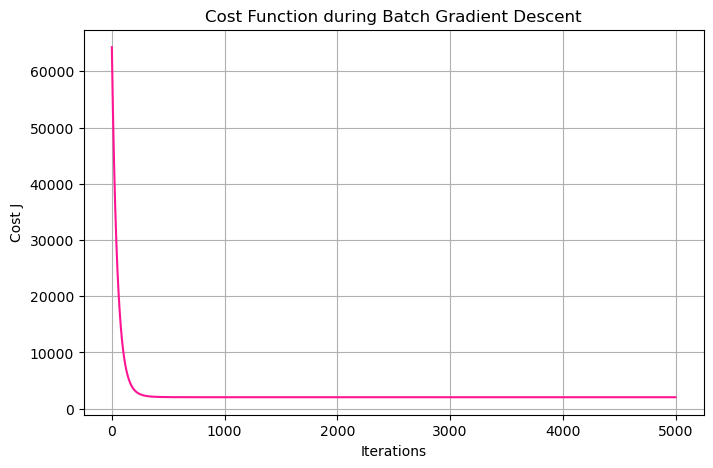

In [ ]:
# Chart the cost history during training
plt.figure(figsize=(8, 5))
plt.plot(history_batch, color='deeppink')
plt.xlabel("Iterations")
plt.ylabel("Cost J")
plt.title("Cost Function during Batch Gradient Descent")
plt.grid(True)
plt.show()

### 5. Gradient descent (stochastic)

In [ ]:
"""
Stochastic GD is the extreme case: it uses exactly 1 sample per update. 
"""

def stochastic_gradient_descent(X, y, alpha=0.01, n_iter=5000, random_state=42):
    """
    Implements Stochastic Gradient Descent (SGD) for linear regression.
    In each iteration, it uses a single random example from the dataset.

    Args:
        X: Feature matrix with bias (n x p)
        y: Target vector (n x 1)
        alpha: Learning rate
        n_iter: Number of iterations
        random_state : Seed for reproducibility
    Returns:
        theta        : Found parameters (p x 1)
        history      : History of cost J (calculated over the entire dataset)
    """
    np.random.seed(random_state)         # Fix seed for reproducibility
    m, p = X.shape                       # m = samples, p = parameters
    theta = np.zeros((p, 1))             # Initialize θ in zeros

    history = []                         # Overall cost history

    for i in range(n_iter):
        # Select ONE random index from the dataset
        idx = np.random.randint(0, m)

        # Extract the single example (as row/column vectors)
        xi = X[idx, :].reshape(1, -1)    # (1 x p)
        yi = y[idx].reshape(1, -1)       # (1 x 1)

        # Gradient based on a single example
        residual = xi @ theta - yi       # (1 x 1)
        gradient = xi.T * residual       # (p x 1)

        # Update θ
        theta = theta - alpha * gradient

        # Record the GLOBAL cost (for all data) for comparison purposes.
        history.append(cost_function(X, y, theta))

    return theta, history


# Execute SGD
theta_sgd, history_sgd = stochastic_gradient_descent(X, y, alpha=0.01, n_iter=5000)

print("Parameters (SGD):")
print(f"  θ₀ (bias):  {theta_sgd[0][0]:.4f}")
print(f"  θ₁ (size):  {theta_sgd[1][0]:.4f}")
print(f"  θ₂ (rooms): {theta_sgd[2][0]:.4f}")

mse_sgd = mean_squared_error(y, X @ theta_sgd)
print(f"MSE (SGD): {mse_sgd:.4f}")

Parameters (SGD):
  θ₀ (bias):  334.6694
  θ₁ (size):  108.6563
  θ₂ (rooms): 0.0161
MSE (SGD): 4157.8127


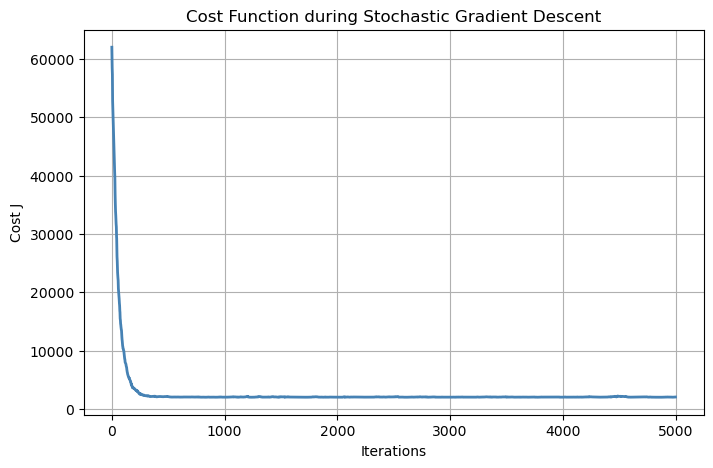

In [ ]:
# Chart the cost history during training (SGD)
plt.figure(figsize=(8, 5))
plt.plot(history_sgd, color='steelblue', linewidth=2)
plt.xlabel("Iterations")
plt.ylabel("Cost J")
plt.title("Cost Function during Stochastic Gradient Descent")
plt.grid(True)
plt.show()

### 6. Gradient descent (mini-batch)

Explicación: 

In [ ]:
"""
Mini-Batch GD is the balance between Batch and SGD: uses a small subset per update.
"""

def minibatch_gradient_descent(X, y, alpha=0.01, n_iter=5000, batch_size=8, random_state=42):
    """
    Implements Mini-Batch Gradient Descent for linear regression.
    Each iteration uses a subset of size batch_size.
    
    Args:
        X            : Feature matrix with bias (n x p)
        y            : Target vector (n x 1)
        alpha        : Learning rate
        n_iter       : Number of iterations
        batch_size: Mini-batch size
        random_state: Seed for reproducibility
    Returns:
        theta: Found parameters (p x 1)
        history: Cost history J
    """
    np.random.seed(random_state)            # Fix seed for reproducibility
    m, p = X.shape                          # m = samples, p = parameters
    theta = np.zeros((p, 1))                # Initialize θ in zeros
    history = []                            # Overall cost history

    for i in range(n_iter):
        # Randomly select ‘batch_size’ indices from the dataset
        indices = np.random.choice(m, size=batch_size, replace=False)  # No replacement

        # Extract the mini-batch of features and labels
        X_batch = X[indices, :]             # Feature sub-array (batch_size x p)
        y_batch = y[indices]                # Target sub-vector (batch_size x 1)

        # Calculate the average gradient over the mini-batch
        residuals = X_batch @ theta - y_batch           # Mini-batch residues
        gradient  = (1 / batch_size) * X_batch.T @ residuals  # Gradient (p x 1)

        theta = theta - alpha * gradient    # Update of θ
        history.append(cost_function(X, y, theta))  # Record overall cost

    return theta, history


# Run Mini-Batch GD with batch_size=8 (approx. 1/5 of the dataset)
theta_mb, history_mb = minibatch_gradient_descent(X, y, alpha=0.01, n_iter=5000, batch_size=8)

print("Parameters (Mini-Batch GD, batch=8):")
print(f"  θ₀ (bias):  {theta_mb[0][0]:.4f}")
print(f"  θ₁ (size):  {theta_mb[1][0]:.4f}")
print(f"  θ₂ (rooms): {theta_mb[2][0]:.4f}")

mse_mb = mean_squared_error(y, X @ theta_mb)
print(f"MSE (Mini-Batch GD): {mse_mb:.4f}")

Parameters (Mini-Batch GD, batch=8):
  θ₀ (bias):  340.7819
  θ₁ (size):  108.9355
  θ₂ (rooms): -4.5832
MSE (Mini-Batch GD): 4089.7949


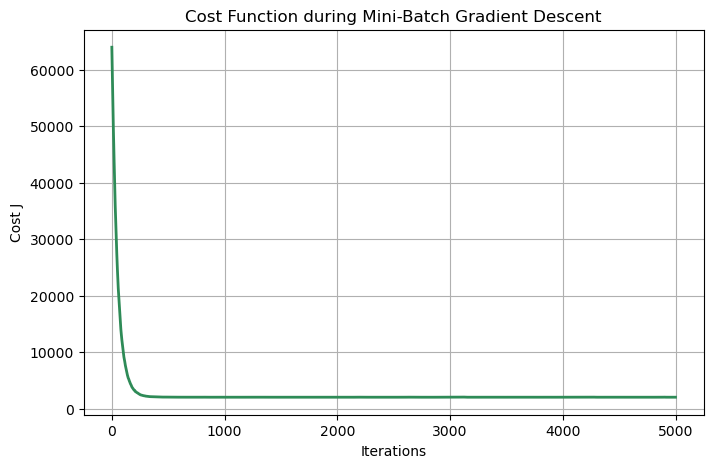

In [ ]:
# Plot the cost history during training (Mini-Batch GD)
plt.figure(figsize=(8, 5))
plt.plot(history_mb, color='seagreen', linewidth=2)  # Less noise than SGD, more than Batch
plt.xlabel("Iterations")
plt.ylabel("Cost J")
plt.title("Cost Function during Mini-Batch Gradient Descent")
plt.grid(True)
plt.show()

---
## 7. Comparación de los tres métodos de descenso por gradiente (curvas de costo)

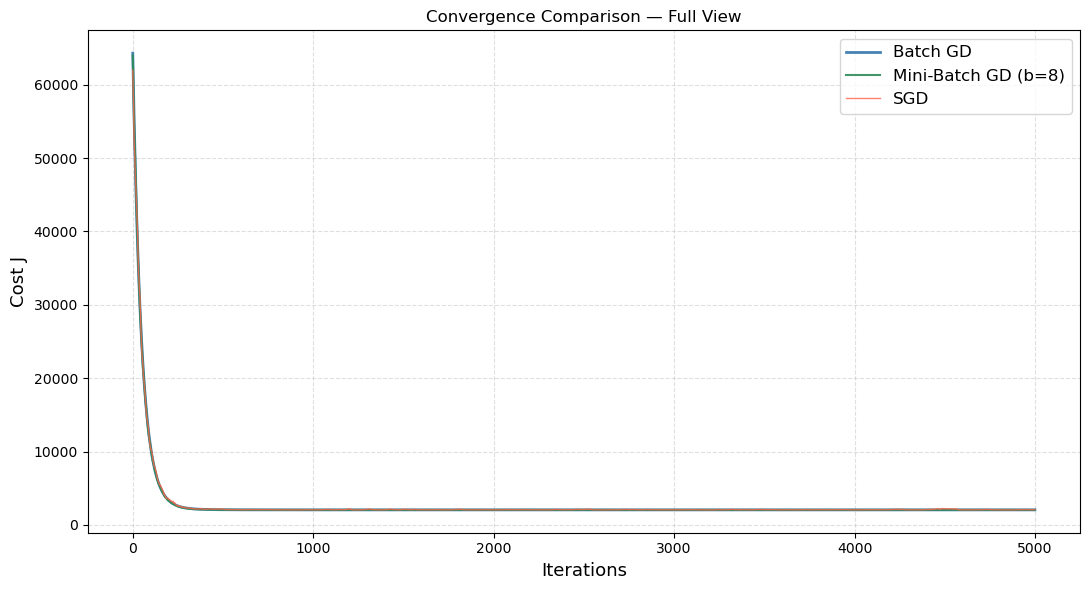

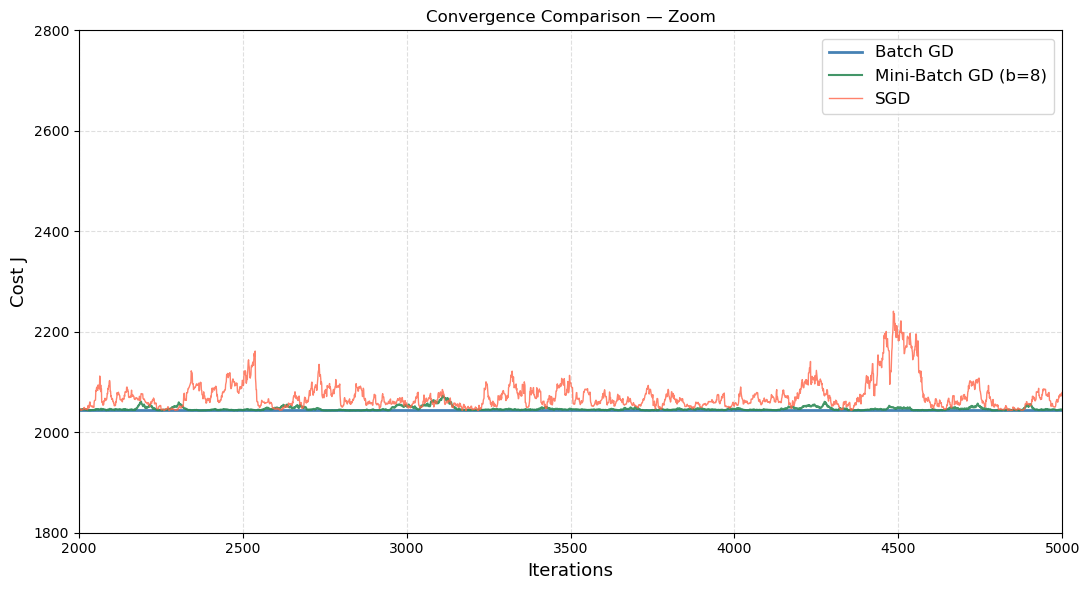

In [ ]:
# Figure 1: Full view
plt.figure(figsize=(11, 6))
plt.plot(history_batch, label='Batch GD',            color='steelblue', linewidth=2)
plt.plot(history_mb,    label='Mini-Batch GD (b=8)', color='seagreen',  linewidth=1.5, alpha=0.9)
plt.plot(history_sgd,   label='SGD',                 color='tomato',    linewidth=1,   alpha=0.8)
plt.xlabel("Iterations", fontsize=13)
plt.ylabel("Cost J", fontsize=13)
plt.title("Convergence Comparison — Full View")
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Figure 2: Zoom showing the differences
plt.figure(figsize=(11, 6))
plt.plot(history_batch, label='Batch GD',            color='steelblue', linewidth=2)
plt.plot(history_mb,    label='Mini-Batch GD (b=8)', color='seagreen',  linewidth=1.5, alpha=0.9)
plt.plot(history_sgd,   label='SGD',                 color='tomato',    linewidth=1,   alpha=0.8)
plt.xlim(2000, 5000)
plt.ylim(1800, 2800)
plt.xlabel("Iterations", fontsize=13)
plt.ylabel("Cost J", fontsize=13)
plt.title("Convergence Comparison — Zoom")
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

---
## 8. Comparación de Parámetros obtenidos con todos los métodos

In [ ]:
# ====== Table 1: Analytical methods (unstandardized data) ======
results_raw = pd.DataFrame({
    'Method': ['Scikit-learn', 'Normal Equation', 'SVD Pseudoinverse'],
    'θ₀ (bias)': [theta_sklearn[0][0], theta[0][0], theta_pinv[0][0]],
    'θ₁ (size)': [theta_sklearn[1][0], theta[1][0], theta_pinv[1][0]],
    'θ₂ (rooms)': [theta_sklearn[2][0], theta[2][0], theta_pinv[2][0]],
    'MSE': [
        mean_squared_error(y_data, X_raw @ theta_sklearn),
        mean_squared_error(y_data, X_raw @ theta),
        mean_squared_error(y_data, X_raw @ theta_pinv)
    ]
})
results_raw = results_raw.set_index('Method').round(4)
print("Analytical Methods (unstandardized):")
display(results_raw)

# ====== Table 2: Gradient Descent (normalized data) ======
results_gd = pd.DataFrame({
    'Method': ['Batch GD', 'SGD', 'Mini-Batch GD'],
    'θ₀ (bias)': [theta_gd[0][0], theta_sgd[0][0], theta_mb[0][0]],
    'θ₁ (size)': [theta_gd[1][0], theta_sgd[1][0], theta_mb[1][0]],
    'θ₂ (rooms)': [theta_gd[2][0], theta_sgd[2][0], theta_mb[2][0]],
    'MSE': [
        mean_squared_error(y, X @ theta_gd),
        mean_squared_error(y, X @ theta_sgd),
        mean_squared_error(y, X @ theta_mb)
    ]
})
results_gd = results_gd.set_index('Method').round(4)
print("\nGradient Descent (normalizado):")
display(results_gd)

Analytical Methods (unstandardized):


,θ₀ (bias),θ₁ (size),θ₂ (rooms),MSE
Method,,,,
Scikit-learn,89597.9095,139.2107,-8738.0191,4.086560e+09
Normal Equation,89597.9095,139.2107,-8738.0191,4.086560e+09
SVD Pseudoinverse,89597.9095,139.2107,-8738.0191,4.086560e+09



Gradient Descent (normalizado):


,θ₀ (bias),θ₁ (size),θ₂ (rooms),MSE
Method,,,,
Batch GD,340.4127,109.4478,-6.5784,4086.5601
SGD,334.6694,108.6563,0.0161,4157.8127
Mini-Batch GD,340.7819,108.9355,-4.5832,4089.7949


## Conclusions

### 1) About normalization
**Scikit-learn, Normal Equation, and SVD:** Normalization is not necessary because it solves the system of equations with linear algebra. The scale of the data does not affect the final result but simply modifies the value of the coefficients.

**Batch GD, SGD y Mini-Batch GD:** require normalization for convergence. Without normalization, the features have quite different scales (size ~2000, rooms ~3), causing the gradient to zigzag and converge quite slowly, or not converge at all.

### 2) SAbout the parameters obtained

**Analytical methods (unnormalized)**

The three methods produce identical parameters because they all solve the same equation: θ = (XᵀX)⁻¹Xᵀy, only by different paths. Their values have a direct interpretation:

| Parameter | Value | Interpretation |
|-----------|-------|----------------|
| θ₀ | ≈ 89,598 | Base price (mathematical intercept) |
| θ₁ | ≈ 139 | Each additional square foot increases the price. ~$139 |
| θ₂ | ≈ -8,738 | Each additional room reduces the price. ~$8,738* |

*Negative because, for the same size, more rooms means smaller rooms.

**Gradient Descent Methods (normalized)**

The parameters are on a normalized scale, so they are not directly comparable with analytics or interpretable in dollars.

**Why is the MSE different?**

| Method | MSE | Scale |
|--------|-----|--------|
| Analytical | ~4.09 × 10⁹ | dolars² |
| Standardized | ~4,086 | thousands of dolars² |

Same precision, different scale: (1000)² = 10⁶


### 3) On convergence

- **Batch GD:** 
  - Use ALL 47 examples to calculate the gradient in each iteration.
  - Smooth and stable convergence: the J curve descends continuously without jumps.
  - Disadvantage: each iteration is costly because it processes the entire dataset.
  - Ideal when: the dataset is small and fits in memory.

- **Mini-Batch GD (batch_size=8):** 
  - Uses subsets of 8 random examples per iteration.
  - Balance between speed and stability: converges faster than Batch GD 
    but with small oscillations in the J-curve.
  - Noise acts as implicit regularization, helping to escape local minima.
  - Ideal when: the dataset is large and a balance between speed and accuracy is needed.

- **SGD (Stochastic Gradient Descent):** 
  - Use ONLY ONE random example per iteration.
  - Very fast convergence in terms of iterations, but with high oscillation/noise.
  - The J curve zigzags a lot because each individual example can have 
    a gradient that is very different from the actual average gradient.
  - It never converges exactly to the minimum, but oscillates around it.
  - Ideal when: the dataset is very large (millions of examples) and speed is needed 
    over accuracy.
  - In this case, SGD did not converge completely: θ₂ (rooms) ≈ 0.016, 
  indicating that the model failed to correctly capture the effect of the 
  number of rooms on the price. This is reflected in its slightly higher MSE 
  (4157 vs. 4086 for Batch GD), which is expected with a fixed learning rate 
  of α=0.01 and only 5000 iterations: SGD oscillates around the minimum but 
  does not settle on it.

